In [1]:
from util import *
import os, shutil
import pandas as pd

from opmap.videoData import VideoData
from opmap.vmemMap import VmemMap
from opmap.phaseMap import PhaseMap
from opmap.phaseVarianceMap import PhaseVarianceMap
from elecpy.elecpySession import ElecpySession

%matplotlib inline

In [3]:
src_dir = '/mnt/recordings/SimulationResult/'
save_dir = '/mnt/recordings/AnalysisResult/Tomii/2018-08-07/'
print(save_dir)
if not os.path.exists(save_dir) : os.mkdir(save_dir)

/mnt/recordings/AnalysisResult/Tomii/2018-08-07/


In [2]:
def analyzeSession(sess, save_dir=None):
    cam = VideoData(*sess.data['vmem'].shape)
    cam.data = - sess.data['vmem']
    v = VmemMap(cam);del(cam)
    p = PhaseMap(v, width = v.data.shape[2]); 
    p.data = - p.data
    pv = PhaseVarianceMap(p, size=3)
    
    if save_dir is not None:
        v.saveImage( os.path.join(save_dir, 'vmem'))
        p.saveImage( os.path.join(save_dir, 'pmap'))
        pv.saveImage( os.path.join(save_dir, 'pvmap'))

    sess.data['phase'] = p.data
    sess.data['pv'] = pv.data

## Check whole dynamics

In [74]:
df = pd.read_csv('data.lr.whole.csv')
df

,sim_id,gna,description
0,20180806-1,16.0,default
1,20180806-2,8.0,sodium channel block
2,20180806-3,8.0,sodium channel block <= 20180806-2
3,20180809-1,16.0,APD prolongation (0.7)
4,20180809-2,16.0,APD prolongation (0.9)
5,20180809-3,16.0,APD prolongation (0.8)
6,20180809-4,16.0,APD prolongation (0.75)
7,20180809-5,16.0,APD prolongation (0.72)
8,20180809-6,16.0,APD prolongation (0.71)
9,20180815-1,3.2,sodium channel block


/mnt/recordings/AnalysisResult/Tomii/2018-08-07/20180817-6


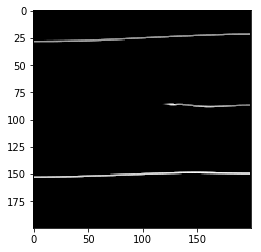

In [75]:
for i, row in df.iterrows():
    
    if i not in [24]: continue
    
    dst_dir = os.path.join(save_dir, '{0}'.format(row['sim_id']))
    print(dst_dir)
    #if os.path.exists(dst_dir) : shutil.rmtree(dst_dir)
    if not os.path.exists(dst_dir) : os.makedirs(dst_dir)
        
    sess = ElecpySession( 
        os.path.join(src_dir, row.sim_id),
        keys= {'vmem'}#, 'phie'}#, 'cell/m', 'cell/h', 'cell/j', 'cell/xina'}
    )
    
    analyzeSession(sess, save_dir=dst_dir)
    
    plt.imshow(np.sum(sess.data['pv'][100:-100,:,:] > 0.3, axis=0), cmap='gray')
    plt.savefig(os.path.join(dst_dir, 'traj.png'))
    